# HOMEWORK 5

GROUP NUMBER: Yixiao Zhao; Junyi Ma; Xinyi Liu; Xiao Li

GROUP MEMBERS that participated in the production of this file: Yixiao Zhao; Junyi Ma; Xinyi Liu; Xiao Li

Comments:

In this problem set you will evaluate and test the CAPM using the cross-sectional framework. 



### 1. 

In order to proceed you need Microsoft Excel  file "https://www.dropbox.com/s/yze3laidhv7gl1x/Homework4.xlsx?dl=1". 

This file contains 

1) one sheet called Market_proxy: It contains monthly  excess return on the market and the risk-free rate 


2) one sheet called 49_Industry_Portfolios: which contains

    * monthly returns of 49 value-weighted industry portfolios; 
    * monthly average firm size (market cap) in each industy portfolio
    * ANNUAL average BooKValue/MarketValue


HINT: 

The easiest way to import this is to use pandas.read_excel

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

Look at the file to see how to adjsut 

read_excel(io, sheetname=0,  skiprows=None,nrows skip_footer=0, index_col=None,  parse_cols=None, parse_dates=False, date_parser=None, na_values=None)

- set sheetname='nameofsheet' you want to import
- use skiprows to tell pandas to skip the first rows before the header
- use index_col, parse_dates, date_parser as we have used several time through out the class notebooks
- use parse_cols to tell pandas which columns to import
    * For example when importing returns you will write parse_cols="A:AX", "AZ:CW" for size and so on
- set na_values as appropriate. Quickly looking at the file you will figure it out
- When import BM note that the date is different since there is only year. So the parser has to be changed approproately
- sometimes pandas import rows that you have no data. You can use nrows or skipfooter to eliminate these rows, or you can open te excel file and manually erase these rows. Even though there is nothing in them, actively erasing and saving is enougth to tell Pandas to not look there. You can also drop the redundant lines them after you import. Just make sure to do it!


In the end you should have 4 dataframes: (MKT,RF returns), (49 returns), (49 size), (49 BM). 

You can join then using merge as we did in class. Or you can keep them separate. whatever you think is easier

But if you merge pay attention because the names can get confusing.


Because I have a soft heart, here is the code that imports size and book to market and merge them together

            url="https://www.dropbox.com/s/yze3laidhv7gl1x/Homework4.xlsx?dl=1"
            import pandas as pd
            parser = lambda date: pd.to_datetime(date,format='%Y')
            BM=pd.read_excel(url, 
                       sheetname='49_Industry_Portfolios', skiprows=6,  index_col=0, 
                       parse_cols="CY:EV", parse_dates=True, date_parser=parser, na_values=-99.99)
            parser = lambda date: pd.to_datetime(date,format='%Y%m')
            SIZE=pd.read_excel(url, 
                       sheetname='49_Industry_Portfolios', skiprows=6,  index_col=0, 
                       parse_cols="AZ:CW", parse_dates=True, date_parser=parser, na_values=-99.99)
            BM['year']=BM.index.year
            SIZE['year']=SIZE.index.year
            Merged=pd.merge(SIZE,BM,'left',on='year',suffixes=['_me','_bm'])
            Merged




### Answer here:

In [1]:
url="https://www.dropbox.com/s/yze3laidhv7gl1x/Homework4.xlsx?dl=1"
import pandas as pd
parser = lambda date: pd.to_datetime(date,format='%Y')
BM=pd.read_excel(url, sheetname='49_Industry_Portfolios', skiprows=6,  index_col=0, 
                 parse_cols="CY:EV", parse_dates=True, date_parser=parser, na_values=-99.99)
parser = lambda date: pd.to_datetime(date,format='%Y%m')
BM['year']=BM.index.year
BM.head()

Agric  Food  Soda  Beer  Smoke  Toys   Fun  Books  Hshld  Clths  \
1926-01-01   0.65  0.63   NaN  2.54   0.79  1.99  0.81   4.34   0.38   0.90   
1927-01-01   0.59  0.53   NaN  1.81   0.69  2.04  0.96   2.17   0.36   0.80   
1928-01-01   0.57  0.41   NaN  0.62   0.69  1.44  0.78   0.73   0.35   1.14   
1929-01-01   0.64  0.37   NaN  0.52   0.67  1.68  0.50   0.61   0.27   1.28   
1930-01-01   0.79  0.47   NaN  1.70   1.30  2.05  0.79   0.87   0.33   0.86   

             ...    Trans  Whlsl  Rtail  Meals  Banks  Insur  RlEst   Fin  \
1926-01-01   ...     1.41   2.35   0.44   0.66   0.66   0.62   0.88  0.98   
1927-01-01   ...     1.30   5.25   0.43   0.59   0.83   0.53   0.77  1.13   
1928-01-01   ...     1.26   0.65   0.34   0.55   0.45   0.41   0.67  0.81   
1929-01-01   ...     1.09   0.39   0.29   0.41   0.29   0.46   0.96  0.46   
1930-01-01   ...     1.39   1.36   0.59   0.74   0.86   0.65   1.66  1.33   

            Other    year  
1926-01-01   0.63  1926.0  
1927-01-01   0.69  1927.0  
1928-01-01   0.60  1928.0  
1929-01-01   0.91  1929.0  
1930-01-01   1.49  1930.0  

[5 rows x 50 columns]

In [2]:
parser = lambda date: pd.to_datetime(date,format='%Y%m')
SIZE=pd.read_excel(url, 
                   sheetname='49_Industry_Portfolios', skiprows=6,  index_col=0, 
                   parse_cols="AZ:CW", parse_dates=True, date_parser=parser, na_values=-99.99)
SIZE['year']=SIZE.index.year
SIZE.head()

Agric   Food  Soda  Beer  Smoke   Toys    Fun  Books  Hshld  \
1926-07-01   99.80  31.19   NaN  7.12  59.72  13.00  28.64   4.33  22.27   
1926-08-01  102.06  31.15   NaN  6.75  60.47  14.12  29.34   6.50  22.13   
1926-09-01  104.34  31.95   NaN  8.58  64.03  16.50  29.10   9.29  21.18   
1926-10-01  102.91  32.21   NaN  8.92  64.42  17.88  30.58   8.83  21.23   
1926-11-01  102.34  30.90   NaN  8.62  65.08  17.62  29.01   9.31  20.14   

            Clths  ...   Trans  Whlsl  Rtail  Meals  Banks  Insur  RlEst  \
1926-07-01  18.36  ...   68.67   1.19  46.65  10.82  14.50  31.82  22.92   
1926-08-01  19.83  ...   69.79   0.90  46.57  11.00  15.17  31.65  23.56   
1926-09-01  19.29  ...   72.90   0.95  46.11  10.94  16.97  32.46  24.47   
1926-10-01  19.03  ...   72.71   0.88  46.15  10.80  16.46  32.66  23.72   
1926-11-01  19.03  ...   70.58   0.74  45.03  10.33  14.52  31.26  22.33   

              Fin  Other  year  
1926-07-01  10.28  24.25  1926  
1926-08-01   9.76  25.51  1926  
1926-09-01   9.70  27.21  1926  
1926-10-01   9.39  26.16  1926  
1926-11-01   9.56  23.94  1926  

[5 rows x 50 columns]

In [3]:
parser = lambda date: pd.to_datetime(date,format='%Y%m')
SIZE=pd.read_excel(url, 
                   sheetname='49_Industry_Portfolios', skiprows=6,  index_col=0, 
                   parse_cols="AZ:CW", parse_dates=True, date_parser=parser, na_values=-99.99)

In [4]:
parser = lambda date: pd.to_datetime(date,format='%Y%m')
Returns=pd.read_excel(url, 
                   sheetname='49_Industry_Portfolios', skiprows=6,  index_col=0, 
                   parse_cols="A:AX", parse_dates=True, date_parser=parser, na_values=-99.99)
Returns= Returns/100
Returns.tail()

Agric    Food    Soda    Beer   Smoke    Toys     Fun   Books  \
2015-03-01 -0.0528  0.0247 -0.0464 -0.0207 -0.0882 -0.0411 -0.0235  0.0048   
2015-04-01  0.0107 -0.0023 -0.0043 -0.0052  0.0594  0.0925  0.0262 -0.0407   
2015-05-01  0.0343  0.0282  0.0020  0.0200  0.0128 -0.0363  0.0168  0.0202   
2015-06-01 -0.0759 -0.0079 -0.0234 -0.0171 -0.0257  0.0046  0.0142  0.0020   
2015-07-01 -0.0275  0.0355  0.0668  0.0351  0.0959 -0.0385  0.0800 -0.0299   

             Hshld   Clths   ...     Boxes   Trans   Whlsl   Rtail   Meals  \
2015-03-01 -0.0198  0.0123   ...   -0.0325 -0.0362  0.0061  0.0099 -0.0029   
2015-04-01 -0.0241 -0.0153   ...   -0.0172 -0.0114 -0.0120 -0.0288  0.0051   
2015-05-01  0.0039  0.0004   ...    0.0033 -0.0306  0.0142  0.0053  0.0156   
2015-06-01 -0.0011  0.0417   ...   -0.0334 -0.0325 -0.0280 -0.0048  0.0029   
2015-07-01  0.0097  0.0597   ...   -0.0090  0.0327 -0.0130  0.0578  0.0415   

             Banks   Insur   RlEst     Fin   Other  
2015-03-01 -0.0083  0.0228  0.0391 -0.0057 -0.0213  
2015-04-01  0.0213 -0.0178 -0.0272  0.0048  0.0034  
2015-05-01  0.0261  0.0464  0.0068  0.0207  0.0084  
2015-06-01  0.0167  0.0217 -0.0298 -0.0058 -0.0384  
2015-07-01  0.0267  0.0166  0.0155  0.0025  0.0285  

[5 rows x 49 columns]

In [5]:
parser = lambda date: pd.to_datetime(date,format='%Y%m')
MKT_RF_Return=pd.read_excel(url, 
                   sheetname='Market_proxy', skiprows=5,  index_col=0, 
                   parse_cols="A:C", parse_dates=True, date_parser=parser, na_values=-99.99)
MKT_RF_Return = MKT_RF_Return/100
MKT_RF_Return.tail()

Mkt-RF   RF
2015-07-01  0.0154  0.0
2015-08-01 -0.0604  0.0
2015-09-01 -0.0308  0.0
2015-10-01  0.0775  0.0
2015-11-01  0.0056  0.0

### 2. 

Consider the cross-sectional regression,

$$	R_i = γ_0 + γ_M β_{i,M} + η_i		(1) $$			
where γ0 and γM are regression parameters and βiM = cov(Ri, RM)/Var(RM). 

A) If the CAPM holds, then  what should γ0 and γM be equal to?





In [6]:
# γ0 = Risk Free Returns
# γM = Market Premium

B) Estimate γ0 and γM using the approach pioneered by Fama and MacBeth. The following  is a brief outline of the procedure:

 - Estimate βiM for each portfolio (denote the estimate biM). Assume that the betas do not change over time; hence, you can estimate the betas using full-period OLS regressions.

 - Each month estimate the cross-sectional regression, Rit = γ0t + γMt biM + nit. Note: the estimated beta (biM ) is the same for every time period (i.e., it has no time subscript).

 - Compute the time series average of the estimates of γ0 and γM. In addition, compute the standard error and t-stat of the time series averages. 

Can you reject the hypothesis that the proxy for the market portfolio is mean variance efficient? Why or why not?
 

In [7]:
Returns['Date']=Returns.index
MKT_RF_Return['Date']=MKT_RF_Return.index
MKT_Returns=pd.merge(Returns,MKT_RF_Return,'left',on='Date',suffixes=['_Return','_RM'])
MKT_Returns=MKT_Returns.set_index(Returns.index)
MKT_Returns.head()

Agric    Food  Soda    Beer   Smoke    Toys     Fun   Books  \
1926-07-01  0.0237  0.0012   NaN -0.0519  0.0129  0.0865  0.0250  0.5021   
1926-08-01  0.0223  0.0268   NaN  0.2703  0.0650  0.1681 -0.0076  0.4298   
1926-09-01 -0.0057  0.0158   NaN  0.0402  0.0126  0.0833  0.0642 -0.0491   
1926-10-01 -0.0046 -0.0368   NaN -0.0331  0.0106 -0.0140 -0.0509  0.0537   
1926-11-01  0.0675  0.0626   NaN  0.0729  0.0455  0.0000  0.0182 -0.0640   

             Hshld   Clths   ...     Rtail   Meals   Banks   Insur   RlEst  \
1926-07-01 -0.0048  0.0808   ...    0.0007  0.0187  0.0461 -0.0054  0.0289   
1926-08-01 -0.0358 -0.0251   ...   -0.0075 -0.0013  0.1183  0.0257  0.0530   
1926-09-01  0.0073 -0.0051   ...    0.0025 -0.0056 -0.0175  0.0072 -0.0306   
1926-10-01 -0.0468  0.0012   ...   -0.0220 -0.0411 -0.1182 -0.0428 -0.0574   
1926-11-01 -0.0054  0.0187   ...    0.0652  0.0433 -0.0297  0.0358  0.0221   

               Fin   Other       Date  Mkt-RF      RF  
1926-07-01 -0.0485  0.0520 1926-07-01  0.0296  0.0022  
1926-08-01 -0.0057  0.0676 1926-08-01  0.0264  0.0025  
1926-09-01 -0.0314 -0.0386 1926-09-01  0.0036  0.0023  
1926-10-01  0.0207 -0.0849 1926-10-01 -0.0324  0.0032  
1926-11-01  0.0492  0.0400 1926-11-01  0.0253  0.0031  

[5 rows x 52 columns]

In [8]:
RiskFreeReturn=MKT_Returns
RiskFreeReturn.iloc[:,0:49]=MKT_Returns.iloc[:,0:49].subtract(MKT_Returns['RF'],axis = 0)
RiskFreeReturn.head()

Agric    Food  Soda    Beer   Smoke    Toys     Fun   Books  \
1926-07-01  0.0215 -0.0010   NaN -0.0541  0.0107  0.0843  0.0228  0.4999   
1926-08-01  0.0198  0.0243   NaN  0.2678  0.0625  0.1656 -0.0101  0.4273   
1926-09-01 -0.0080  0.0135   NaN  0.0379  0.0103  0.0810  0.0619 -0.0514   
1926-10-01 -0.0078 -0.0400   NaN -0.0363  0.0074 -0.0172 -0.0541  0.0505   
1926-11-01  0.0644  0.0595   NaN  0.0698  0.0424 -0.0031  0.0151 -0.0671   

             Hshld   Clths   ...     Rtail   Meals   Banks   Insur   RlEst  \
1926-07-01 -0.0070  0.0786   ...   -0.0015  0.0165  0.0439 -0.0076  0.0267   
1926-08-01 -0.0383 -0.0276   ...   -0.0100 -0.0038  0.1158  0.0232  0.0505   
1926-09-01  0.0050 -0.0074   ...    0.0002 -0.0079 -0.0198  0.0049 -0.0329   
1926-10-01 -0.0500 -0.0020   ...   -0.0252 -0.0443 -0.1214 -0.0460 -0.0606   
1926-11-01 -0.0085  0.0156   ...    0.0621  0.0402 -0.0328  0.0327  0.0190   

               Fin   Other       Date  Mkt-RF      RF  
1926-07-01 -0.0507  0.0498 1926-07-01  0.0296  0.0022  
1926-08-01 -0.0082  0.0651 1926-08-01  0.0264  0.0025  
1926-09-01 -0.0337 -0.0409 1926-09-01  0.0036  0.0023  
1926-10-01  0.0175 -0.0881 1926-10-01 -0.0324  0.0032  
1926-11-01  0.0461  0.0369 1926-11-01  0.0253  0.0031  

[5 rows x 52 columns]

In [9]:
# Step1 : estimating betas and average returns in the full sample
# cosntruct excess returns for the 10 test portoflios
Estimates=pd.DataFrame(RiskFreeReturn.iloc[:,0:49].mean())
Estimates.columns=['AvgReturns']
Estimates.head()

AvgReturns
Agric    0.006819
Food     0.007215
Soda     0.007834
Beer     0.009352
Smoke    0.008880

In [10]:
Estimates['beta']=Estimates['AvgReturns']*0
Estimates.head()

AvgReturns  beta
Agric    0.006819   0.0
Food     0.007215   0.0
Soda     0.007834   0.0
Beer     0.009352   0.0
Smoke    0.008880   0.0

In [11]:
# estimate bestas for all portoflios
import statsmodels.api as sm
for portfolios in Estimates.index:
    x=sm.add_constant(RiskFreeReturn['Mkt-RF'])
    y=RiskFreeReturn[portfolios]
    # results = sm.OLS(y,x).fit()
    results= sm.OLS(y,x,missing='drop').fit()
    # record slope estiamtes
    Estimates.set_value(portfolios,'beta',results.params[1])

Estimates.head()

D:\Software\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


AvgReturns      beta
Agric    0.006819  0.917173
Food     0.007215  0.728618
Soda     0.007834  0.840749
Beer     0.009352  0.946365
Smoke    0.008880  0.631790

In [12]:
# here I am just initiating a dataframe wich has as index the dates
B=RiskFreeReturn.iloc[:,0:2].copy()
B.columns=['γ0','γ1']
B.head()

γ0      γ1
1926-07-01  0.0215 -0.0010
1926-08-01  0.0198  0.0243
1926-09-01 -0.0080  0.0135
1926-10-01 -0.0078 -0.0400
1926-11-01  0.0644  0.0595

In [13]:
# whatever values these columns have will be overwritten by the for loop below

x=sm.add_constant(Estimates['beta'])
for date in RiskFreeReturn.index:
    y=(RiskFreeReturn.loc[date,:]).iloc[0:49].convert_objects(convert_numeric=True)
    results =sm.OLS(y,x,missing='drop').fit()
    # record slope estiamtes
    B.set_value(date,'γ0',results.params[0])
    B.set_value(date,'γ1',results.params[1])
B.head()

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


γ0        γ1
1926-07-01  0.030723 -0.001180
1926-08-01  0.045367 -0.003406
1926-09-01  0.036414 -0.038136
1926-10-01  0.030804 -0.062423
1926-11-01  0.053362 -0.023481

In [14]:
coefficientsAVG=B.mean()
coefficientsSTDEV=B.std()
samplesize=B.shape[0]

In [15]:
coefficientsAVG

γ0    0.005196
γ1    0.002314
dtype: float64

In [16]:
coefficientsSTDEV/samplesize**0.5

γ0    0.001904
γ1    0.002560
dtype: float64

In [17]:
tstat=coefficientsAVG/(coefficientsSTDEV/(samplesize**0.5))
tstat

γ0    2.728716
γ1    0.904123
dtype: float64

In [18]:
# Reject. The t value of γ0 is too big.
# According to Fama and MacBeth's standard t-test formula, the result implies that γ0 does not equal to risk free rate.


C).	Estimate the cross-sectional regression, average(Ri) = γ0 + γM biM + ni.  
Are the estimates of γ0 and γM different than the average estimates in part b?  
Are the standard errors of the estimates of γ0 and γM different than the standard errors of the average estimates in question 2? Why or why not? 
Which method is superior? Why?





 ### Answer here:

In [19]:
# Step 2: Cross-sectional regression of average returns on betas
y= Estimates['AvgReturns']
x= sm.add_constant(Estimates['beta'])
results= sm.OLS(y,x,data=Estimates).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AvgReturns   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.687
Date:                Mon, 23 Oct 2017   Prob (F-statistic):              0.108
Time:                        23:52:36   Log-Likelihood:                 250.03
No. Observations:                  49   AIC:                            -496.1
Df Residuals:                      47   BIC:                            -492.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.001      5.855      0.000       0.004       0.008
beta           0.0015      0.001      1.639      0.108      -0.000       0.003
==============================================================================
Omnibus:                        4.612   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.587
Skew:                          -0.474   Prob(JB):                        0.166
Kurtosis:                       3.927   Cond. No.                         9.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# γ0 = 0.0059
# γ1 = 0.0015

In [21]:
# Are the estimates of γ0 and γM different than the average estimates in part b?
#  It is different, but γ0 is close, and γM is a little bit close

# Are the standard errors of the estimates of γ0 and γM different than the standard errors of the average estimates in question 2?
# They are different because Question C use the average return and only run one regression to get the γ0 and γM, While question B use 
# for loop to get γ0 and γM monthly and average at the end.

# Why or why not? Which method is superior? Why?
# The Fama and MacBeth (Question B Method) method is better since it can test with more data, and we won't lose much information.


D).	Plot the average(Ri) for the portfolios against their biM. 
Does the plot resemble a positive relationship? 
What should the plot look like?

### Answer here:

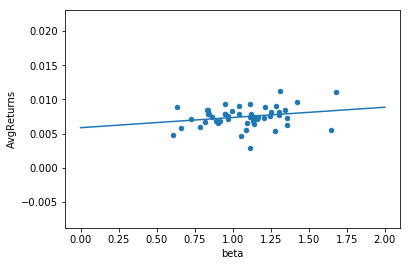

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
Estimates.plot(x='beta',y='AvgReturns',kind='scatter')
betas=np.linspace(0,2,100)
plt.plot(betas,results.predict(exog=sm.add_constant(betas)))

In [23]:
# It indicates a weakly positive relationship. The line should be steeper with a larger positive slope.



E) Now, Consider the cross-sectional regression, 

$$		Ri = γ_0 + γ_M β_{iM} + γ_{size} ln(size)  + γ_{B/M} ln(BE/ME) + ηi,$$
 
	where γ0, γM, γsize, and γB/M are regression parameters,  βiM = cov(Ri, RM)/σ2(RM), and size and BE/ME are the average size and  book to market ratio of the portfolio. 

Note that size is provided on a monthly basis, but BE/ME is provided on an annual basis. For simplicity, assume BE/ME within each year is constant so that you have 12 constant BE/ME numbers within each year.

If the CAPM holds, then what  γsize and γB/M should be equal to? 



In [24]:
# γsize = 0
# γB/M  = 0

F). Estimate γ0, γM, γsize and γB/M using the Fama MacBeth procedure. The following is a brief outline of the procedure:

   -  Estimate βiM for each portfolio. Assume that the betas do not change over time; hence, you can estimate the betas using full-period OLS regressions. (Note:  you have already done this.)

   -  Each month estimate the regression, 

$$		Ri = γ_0 + γ_M β_{iM} + γ_{size} ln(size)  + γ_{B/M} ln(BE/ME) + ηi,$$

Note: You need to lag size and BE/ME appropriately in the regression. This means that size and BE/ME need to be measured ex ante and therefore must be the previous month’s size and previous year’s BE/ME.

     * Why is it important that the size and BE/ME characteristics should be lagged values?

  - Compute the time series average of the estimates of γ0, γM, γsize, and γB/M. In addition compute the standard error and t-stat of the time series averages. (Cosntruct t-tests usign the relevant null for the CAPM. For example use your answer to A as the null for  γsize and γB/M  )

Can you reject the hypothesis that the proxy for the market portfolio is mean variance efficient? Why or why not?


 ### Answer here:

In [25]:
BM['year']=BM.index.year
SIZE['year']=SIZE.index.year
SBM=pd.merge(SIZE,BM,'left',on='year',suffixes=['_s',''])
SBM = SBM.set_index(SIZE.index)
SBM.head()
ExpandedBM = SBM.iloc[:,50:]
ExpandedBM.head()

Agric  Food  Soda  Beer  Smoke  Toys   Fun  Books  Hshld  Clths  \
1926-07-01   0.65  0.63   NaN  2.54   0.79  1.99  0.81   4.34   0.38    0.9   
1926-08-01   0.65  0.63   NaN  2.54   0.79  1.99  0.81   4.34   0.38    0.9   
1926-09-01   0.65  0.63   NaN  2.54   0.79  1.99  0.81   4.34   0.38    0.9   
1926-10-01   0.65  0.63   NaN  2.54   0.79  1.99  0.81   4.34   0.38    0.9   
1926-11-01   0.65  0.63   NaN  2.54   0.79  1.99  0.81   4.34   0.38    0.9   

            ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  RlEst  \
1926-07-01  ...     0.97   1.41   2.35   0.44   0.66   0.66   0.62   0.88   
1926-08-01  ...     0.97   1.41   2.35   0.44   0.66   0.66   0.62   0.88   
1926-09-01  ...     0.97   1.41   2.35   0.44   0.66   0.66   0.62   0.88   
1926-10-01  ...     0.97   1.41   2.35   0.44   0.66   0.66   0.62   0.88   
1926-11-01  ...     0.97   1.41   2.35   0.44   0.66   0.66   0.62   0.88   

             Fin  Other  
1926-07-01  0.98   0.63  
1926-08-01  0.98   0.63  
1926-09-01  0.98   0.63  
1926-10-01  0.98   0.63  
1926-11-01  0.98   0.63  

[5 rows x 49 columns]

In [26]:
#LagSBM = SBM.shift(periods=1, freq=None, axis=0)
#LagSBM.head()

In [27]:
LogSize=SIZE.shift(1)
LogSize=np.log(LogSize)
TLogSize=LogSize.T
TLogSize.head()

1926-07-01  1926-08-01  1926-09-01  1926-10-01  1926-11-01  1926-12-01  \
Agric         NaN    4.603168    4.625561    4.647655    4.633855    4.628301   
Food          NaN    3.440098    3.438814    3.464172    3.472277    3.430756   
Soda          NaN         NaN         NaN         NaN         NaN         NaN   
Beer          NaN    1.962908    1.909543    2.149434    2.188296    2.154085   
Smoke         NaN    4.089667    4.102147    4.159352    4.165424    4.175617   

       1927-01-01  1927-02-01  1927-03-01  1927-04-01     ...      2014-10-01  \
Agric    4.693639    4.652435    4.615220    4.688868     ...        8.842789   
Food     3.490124    3.482777    3.476923    3.511844     ...        8.955061   
Soda          NaN         NaN         NaN         NaN     ...       10.020999   
Beer     2.224624    2.183802    2.178155    2.298577     ...        9.877807   
Smoke    4.214791    4.233672    4.289774    4.296605     ...       11.065289   

       2014-11-01  2014-12-01  2015-01-01  2015-02-01  2015-03-01  2015-04-01  \
Agric    8.818354    8.846477    8.882865    8.978093    8.965198    8.985796   
Food     8.952269    8.976020    9.022408    9.007196    8.980867    9.035830   
Soda    10.039147   10.035847   10.103541   10.050159   10.038952   10.101787   
Beer     9.880649    9.912965    9.955269    9.906021    9.914999    9.957724   
Smoke   11.074880   11.134361   11.141911   11.098942   11.128023   11.181234   

       2015-05-01  2015-06-01  2015-07-01  
Agric    8.927690    8.938028    8.971787  
Food     9.058524    9.053953    9.080309  
Soda    10.047296   10.043015   10.044978  
Beer     9.931587    9.926386    9.945515  
Smoke   11.077282   11.135005   11.147726  

[5 rows x 1069 columns]

In [28]:
LogBM=ExpandedBM.shift(1)
LogBM=np.log(LogBM)
TLogBM = LogBM.T
TLogBM.head()

1926-07-01  1926-08-01  1926-09-01  1926-10-01  1926-11-01  1926-12-01  \
Agric         NaN   -0.430783   -0.430783   -0.430783   -0.430783   -0.430783   
Food          NaN   -0.462035   -0.462035   -0.462035   -0.462035   -0.462035   
Soda          NaN         NaN         NaN         NaN         NaN         NaN   
Beer          NaN    0.932164    0.932164    0.932164    0.932164    0.932164   
Smoke         NaN   -0.235722   -0.235722   -0.235722   -0.235722   -0.235722   

       1927-01-01  1927-02-01  1927-03-01  1927-04-01     ...      2014-10-01  \
Agric   -0.430783   -0.527633   -0.527633   -0.527633     ...       -1.514128   
Food    -0.462035   -0.634878   -0.634878   -0.634878     ...       -0.967584   
Soda          NaN         NaN         NaN         NaN     ...       -1.560648   
Beer     0.932164    0.593327    0.593327    0.593327     ...       -1.386294   
Smoke   -0.235722   -0.371064   -0.371064   -0.371064     ...       -1.771957   

       2014-11-01  2014-12-01  2015-01-01  2015-02-01  2015-03-01  2015-04-01  \
Agric   -1.514128   -1.514128   -1.514128   -1.660731   -1.660731   -1.660731   
Food    -0.967584   -0.967584   -0.967584   -0.941609   -0.941609   -0.941609   
Soda    -1.560648   -1.560648   -1.560648   -1.609438   -1.609438   -1.609438   
Beer    -1.386294   -1.386294   -1.386294   -1.560648   -1.560648   -1.560648   
Smoke   -1.771957   -1.771957   -1.771957   -2.040221   -2.040221   -2.040221   

       2015-05-01  2015-06-01  2015-07-01  
Agric   -1.660731   -1.660731   -1.660731  
Food    -0.941609   -0.941609   -0.941609  
Soda    -1.609438   -1.609438   -1.609438  
Beer    -1.560648   -1.560648   -1.560648  
Smoke   -2.040221   -2.040221   -2.040221  

[5 rows x 1069 columns]

In [29]:
# Create dataframe F, and the data inside will be replaced in the future
F=RiskFreeReturn.iloc[:,0:4].copy()
F.columns=['γ0','γ1','γsize','γB/M']
F.shape

(1069, 4)

In [30]:
RiskFreeReturn.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01'],
              dtype='datetime64[ns]', length=1069, freq=None)

In [31]:
q=0
for date in RiskFreeReturn.index:
    y=(RiskFreeReturn.loc[date,:]).iloc[0:49].convert_objects(convert_numeric=True)
    w=q+1
    bm=TLogBM.iloc[:,q:w]
    size=TLogSize.iloc[:,q:w]
    BetaSizeBM=Estimates.iloc[:,1:]
    BetaSizeBM['Portfolio']=BetaSizeBM.index
    size['Portfolio']=size.index
    bm['Portfolio']=bm.index
    BetaSizeBM1=pd.merge(BetaSizeBM,size,'left',on='Portfolio',suffixes=['Beta','Size'])
    BetaSizeBM2=pd.merge(BetaSizeBM1,bm,'left',on='Portfolio',suffixes=['s','_bm'])
    BetaSizeBM2 = BetaSizeBM2.set_index(Estimates.index)
    BetaSizeBM2.columns = ['beta', 'Portfolio','Size','BM']
    
   # Since you do not mention haow to deal with the NaN value, so I changed all them into 0
    BetaSizeBM2=BetaSizeBM2.fillna(0)
    
    x=sm.add_constant(BetaSizeBM2[['beta','Size','BM' ]])
    results =sm.OLS(y,x,missing='drop').fit()
    # record slope estiamtes
    F.set_value(date,'γ0',results.params[0])
    F.set_value(date,'γ1',results.params[1])
    F.set_value(date,'γsize',results.params[2])
    F.set_value(date,'γB/M',results.params[3])
    q=q+1



D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the 

In [32]:
F.head()

γ0        γ1     γsize      γB/M
1926-07-01  0.030723 -0.001180  0.000000  0.000000
1926-08-01  0.095764 -0.037704  0.001161  0.115863
1926-09-01 -0.028167 -0.023289  0.015534  0.018718
1926-10-01 -0.042862 -0.049260  0.019660  0.042122
1926-11-01  0.061378 -0.022340 -0.003661 -0.019920

In [33]:
FcoefficientsAVG=F.mean()
FcoefficientsSTDEV=F.std()
FcoefficientsAVG

γ0       0.006111
γ1       0.001718
γsize   -0.000717
γB/M    -0.003980
dtype: float64

In [34]:
Fsamplesize=F.shape[0]
Ftstats=FcoefficientsAVG/(FcoefficientsSTDEV/(Fsamplesize**0.5))
Ftstats

γ0       2.073805
γ1       0.797534
γsize   -1.728860
γB/M    -5.196091
dtype: float64

In [ ]:
# CAPM do not hold, and we reject the hypothesis.